In [45]:
# Traffic Forecasting
import pandas as pd
import numpy as np
from aeon.utils.plotting import plot_series
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.base import ForecastingHorizon
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error

data = pd.read_csv("Dates.csv")

                  Date  Clicks
Date                          
2023-05-11  2023-05-11      33
2023-05-10  2023-05-10      32
2023-05-09  2023-05-09      42
2023-05-08  2023-05-08      48
2023-05-07  2023-05-07      38
...                ...     ...
2023-02-16  2023-02-16      26
2023-02-15  2023-02-15      34
2023-02-14  2023-02-14      33
2023-02-13  2023-02-13      47
2023-02-12  2023-02-12      37

[89 rows x 2 columns]


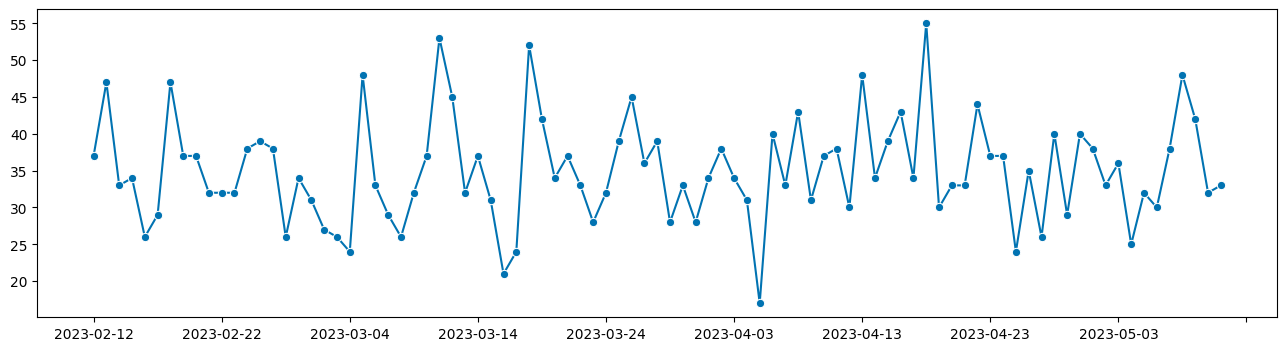

In [46]:
# reduce to only the columns we need
data = data[["Date", "Clicks"]]

# transform into data like:
# Period
# 1960-08    606.0
# 1960-09    508.0

series = data.squeeze()
# set index
series.index = pd.PeriodIndex(series["Date"], freq='D')

print(series)
# remove date column
series = series.drop("Date", axis=1)

# reverse series by index
series = series.iloc[::-1]

# print(series)

# visualize data
plot_series(series)

y_train, y_test = temporal_train_test_split(series)

In [48]:
from aeon.forecasting.trend import TrendForecaster

forecaster = TrendForecaster()

fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster.fit(y_train)

TrendForecaster()

               Clicks
2023-04-19  36.718881
2023-04-20  36.766120
2023-04-21  36.813360
2023-04-22  36.860599
2023-04-23  36.907838
0.1665450958876659


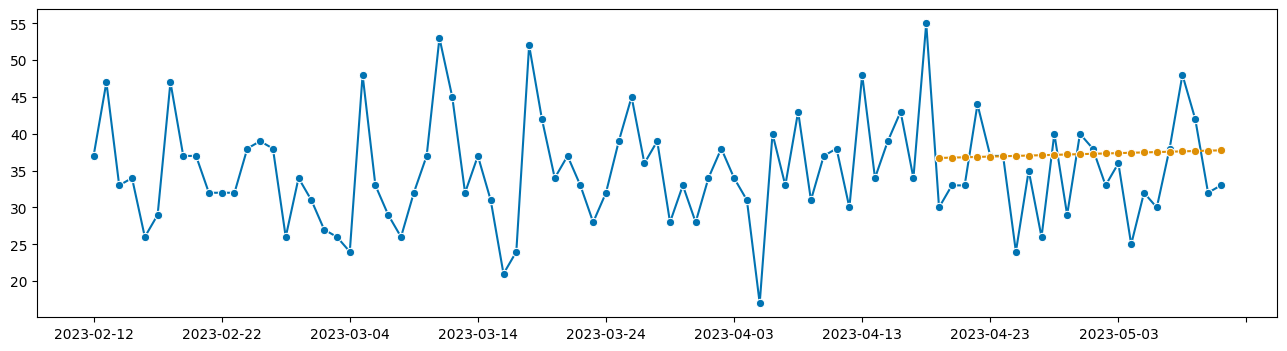

In [53]:
prediction = forecaster.predict(fh)

print(prediction.head())

plot_series(series, prediction)

print(mean_absolute_percentage_error(y_test, prediction))

In [63]:
from prophet import Prophet

data = pd.read_csv("Dates.csv")

# set to ds/y
data = data[["Date", "Clicks"]]
data.columns = ["ds", "y"]

y_train, y_test = temporal_train_test_split(data)

model = Prophet()

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

print(y_train.head())

model.fit(y_train)

future = model.make_future_dataframe(periods=len(y_test), freq='D')
future.tail()

forecast = model.predict(future)
forecast.tail()


AttributeError: 'Prophet' object has no attribute 'stan_backend'